# SPN1 Grassy Knoll Analysis - June 1st

# Comparison of four collocated instruments.
+ SPN1 - A1595: Shielded (as per design) [delta-t site](http://www.delta-t.co.uk/product/spn1/)
+ SPN1 - A1596: Shield removed (and system flashed with updated firmware)
+ SPP  - flex0010: Eppley Shortwave Sensor [Eppley Site](http://www.eppleylab.com/instrument-list/standard-precision-pyranometer/)
+ SPP  - flex1000: Eppley Shortwave Sensor [Eppley Site](http://www.eppleylab.com/instrument-list/standard-precision-pyranometer/)

### Site setup description
***Describe the general layout of the sensors***

### Program to read and plot sensor data

In [1]:
%matplotlib inline

In [2]:
#basic function imports
import pandas as pd
import numpy as np
import datetime

In [3]:
# Imports for plotting tweeks
import matplotlib.pyplot as plt


#### Ingest SPN1 data
(slow to load and I think it is due to setting the index to the Time)

In [4]:
### load spn1 data
f1 = 'data/SPN1_20170601/A1595_Mask_thin.txt'
df1 = pd.read_csv(f1,header=4,delimiter='\t',parse_dates=[0],index_col='Time')
df1.Total = pd.to_numeric(df1.Total, errors='coerce')
df1_min = df1.resample('T').mean()

f2 = 'data/SPN1_20170601/A1596_NOMASK_thin.txt'
df2 = pd.read_csv(f2,header=4,delimiter='\t',parse_dates=[0],index_col='Time')
df2.Total = pd.to_numeric(df2.Total, errors='coerce')
df2_min = df2.resample('T').mean()


/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Ingest flex data

In [5]:
### load flex data
f3 = 'data/SPN1_20170601/flex0010-native.swr'
df3 = pd.read_csv(f3,header=5,delimiter='\s+', 
		names=['Date','Time', 'Total', 'StdDev', 'Nsec'], 
		na_values = [1E+35], parse_dates=[['Date', 'Time']],index_col='Date_Time')
df3_min = df3.resample('T').mean()

f4 = 'data/SPN1_20170601/flex1000-native.swr' # truth?
df4 = pd.read_csv(f4,header=5,delimiter='\s+', 
		names=['Date','Time', 'Total', 'StdDev', 'Nsec'], 
		na_values = [1E+35], parse_dates=[['Date', 'Time']],index_col='Date_Time')
df4_min = df4.resample('T').mean()


#### Add the nearby UW rooftop shortwave sensor
[UW rooftop data site](http://www-k12.atmos.washington.edu/k12/grayskies/plot_nw_wx.cgi?Measurement=Solar&station=UWA&interval=168&timezone=7&rightlab=y&connect=lines&groupby=overlay&begmonth=1&begday=1&begyear=2017&beghour=0&endmonth=1&endday=1&endyear=2017&endhour=0)

In [50]:
# UW data from rooftop
f5 = 'data/SPN1_20170601/UW_Radn_rooftop.xlsx'
df5 = pd.read_excel(f5,parse_dates=[['Date', 'Time']],index_col='Date_Time')


In [51]:

## appearent 30min offset in data.  
#Determined by calculating solar noon on May, 27th 2017 (12:06:31 local 19:06:31 UTC)
# and comparing to largest value on that day which is at 19:35 - there appears to be a ~29min positive offset
df5_s = df5.tshift(29, freq='T')

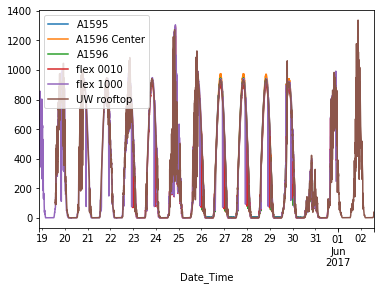

In [52]:
plt.figure()
plt.subplot(1,1,1)
df1_min.plot(x=df1_min.index,y=['Total'], ax=plt.gca())
df2_min.plot(x=df2_min.index,y=['Total'], ax=plt.gca())
df2_min.plot(x=df2_min.index,y=['Diffuse'], ax=plt.gca())
df3_min.plot(x=df3_min.index,y=['Total'], ax=plt.gca())
df4_min.plot(x=df4_min.index,y=['Total'], ax=plt.gca())
df5_s.plot(x=df5_s.index,y=['Radn'], ax=plt.gca())
ax1=plt.gca()
ax1.legend(['A1595','A1596 Center', 'A1596','flex 0010','flex 1000','UW rooftop'])

There is a three day ideal period on the 26-30

### So lets zoom in on the 26-30

In [53]:
###subset
df1_sub = df1_min.loc['2017-05-26 00:00:00':'2017-05-29 06:00:00'].copy()
df2_sub = df2_min.loc['2017-05-26 00:00:00':'2017-05-29 06:00:00'].copy()
df3_sub = df3_min.loc['2017-05-26 00:00:00':'2017-05-29 06:00:00'].copy()
df4_sub = df4_min.loc['2017-05-26 00:00:00':'2017-05-29 06:00:00'].copy()
df5_sub = df5_s.loc['2017-05-26 00:00:00':'2017-05-29 06:00:00'].copy()

###subset
df1_zoom = df1_min.loc['2017-05-27 12:00:00':'2017-05-28 06:00:00'].copy()
df2_zoom = df2_min.loc['2017-05-27 12:00:00':'2017-05-28 06:00:00'].copy()
df3_zoom = df3_min.loc['2017-05-27 12:00:00':'2017-05-28 06:00:00'].copy()
df4_zoom = df4_min.loc['2017-05-27 12:00:00':'2017-05-28 06:00:00'].copy()
df5_zoom = df5_s.loc['2017-05-27 12:00:00':'2017-05-28 06:00:00'].copy()


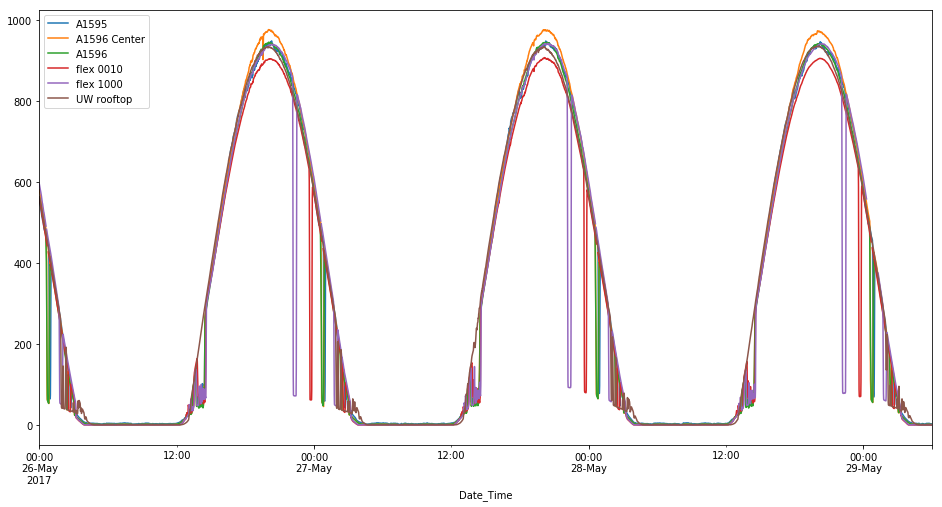

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
df1_sub.plot(x=df1_sub.index,y=['Total'], ax=plt.gca())
df2_sub.plot(x=df2_sub.index,y=['Total'], ax=plt.gca())
df2_sub.plot(x=df2_sub.index,y=['Diffuse'], ax=plt.gca())
df3_sub.plot(x=df3_sub.index,y=['Total'], ax=plt.gca())
df4_sub.plot(x=df4_sub.index,y=['Total'], ax=plt.gca())
df5_sub.plot(x=df5_sub.index,y=['Radn'], ax=plt.gca())
ax1=plt.gca()
ax1.legend(['A1595','A1596 Center', 'A1596','flex 0010','flex 1000','UW rooftop'])

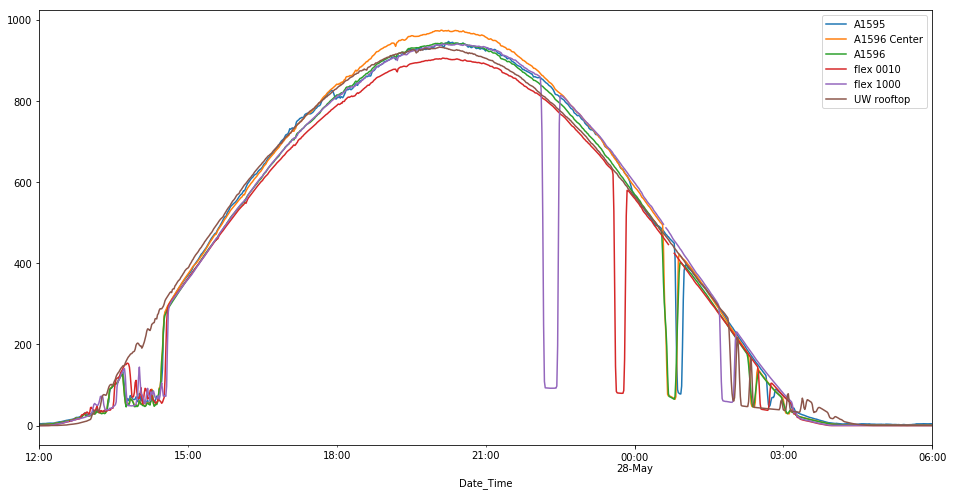

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
df1_zoom.plot(x=df1_zoom.index,y=['Total'], ax=plt.gca())
df2_zoom.plot(x=df2_zoom.index,y=['Total'], ax=plt.gca())
df2_zoom.plot(x=df2_zoom.index,y=['Diffuse'], ax=plt.gca())
df3_zoom.plot(x=df3_zoom.index,y=['Total'], ax=plt.gca())
df4_zoom.plot(x=df4_zoom.index,y=['Total'], ax=plt.gca())
df5_zoom.plot(x=df5_zoom.index,y=['Radn'], ax=plt.gca())
ax1=plt.gca()
ax1.legend(['A1595','A1596 Center', 'A1596','flex 0010','flex 1000','UW rooftop'])

Notice the data drops (values that fall towards zero) that are inconcistent between instruments on each day.  I believe these are due to shadows being cast on instruments (but not all the instruments at the same time).  ***A picture of the site would be helpful here***

Also notice the offset between the UW instrument and the other 4 instruments.  Zooming in more indicates its about a 30min discrepency between the UW radiometer and the 4 grassy knoll instruments.  It is not clear which system has the time error - this needs to be investigated.
**Error appears to be in UW instrument... comparing the max solar value on May 26th 2017

If the instruments are all well characterized, then we would expect each to be outputting equal values (within the range due to instrument uncertainty). 

A1595 Appears to be better compared with A1596 in the morning than after 18:00UTC

### Lets look at the difference between instruments if we select the flex1000 as our "truth" instrument

(-200, 200)

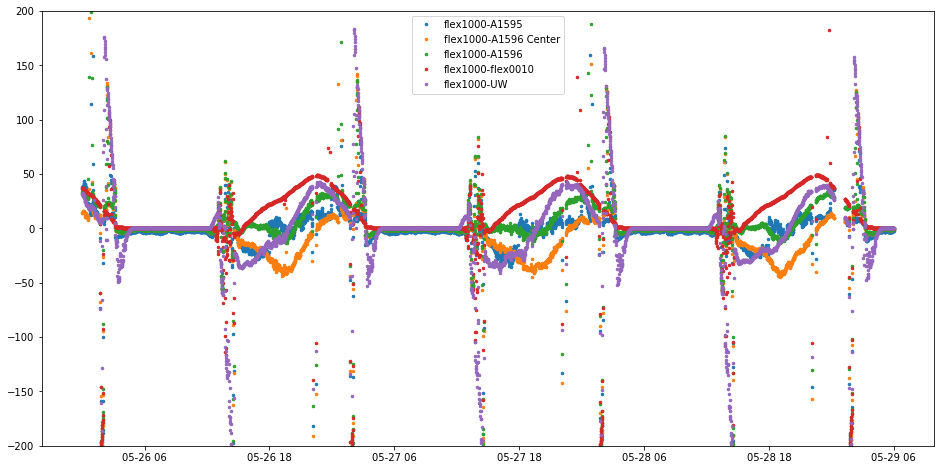

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
plt.plot(df4_sub.index,df4_sub['Total']-df1_sub['Total'],'.',markersize=5)
plt.plot(df4_sub.index,df4_sub['Total']-df2_sub['Total'],'.',markersize=5)
plt.plot(df4_sub.index,df4_sub['Total']-df2_sub['Diffuse'],'.',markersize=5)
plt.plot(df4_sub.index,df4_sub['Total']-df3_sub['Total'],'.',markersize=5)
plt.plot(df5_sub.index,df4_sub['Total']-df5_sub['Radn'],'.',markersize=5)
ax1=plt.gca()
ax1.legend(['flex1000-A1595','flex1000-A1596 Center', 'flex1000-A1596','flex1000-flex0010','flex1000-UW'])
ax1.set_ylim([-200,200])


Outside of the early morning, the comparison between the flex1000 unit and the A1595 unit looks pretty good.

The A1596 appears to have a response that is a function of pre/post solar noon with an overestimate in the morning and an underestimate in the evening.

The two flex instruments also appear to have a different morning/evening response

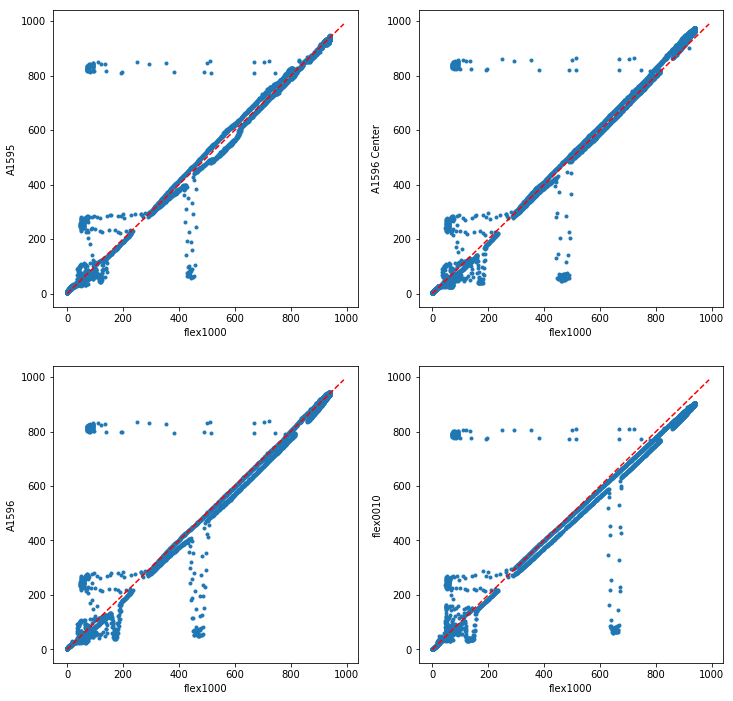

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(df4_sub['Total'],df1_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1595')
plt.xlabel('flex1000')
plt.subplot(2,2,2)
plt.plot(df4_sub['Total'],df2_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1596 Center')
plt.xlabel('flex1000')
plt.subplot(2,2,3)
plt.plot(df4_sub['Total'],df2_sub['Diffuse'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1596')
plt.xlabel('flex1000')
plt.subplot(2,2,4)
plt.plot(df4_sub['Total'],df3_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('flex0010')
plt.xlabel('flex1000')


### Lets look at the difference between instruments if we select the flex0010 as our "truth" instrument

via correspondence with J. Keane - flex0010 was more recently calibrated

(-200, 200)

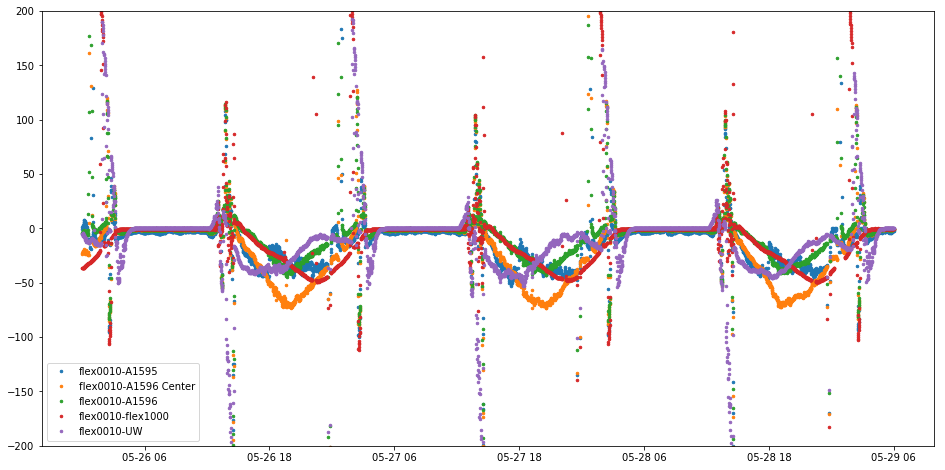

In [57]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
plt.plot(df3_sub.index,df3_sub['Total']-df1_sub['Total'],'.',markersize=5)
plt.plot(df3_sub.index,df3_sub['Total']-df2_sub['Total'],'.',markersize=5)
plt.plot(df3_sub.index,df3_sub['Total']-df2_sub['Diffuse'],'.',markersize=5)
plt.plot(df3_sub.index,df3_sub['Total']-df4_sub['Total'],'.',markersize=5)
plt.plot(df3_sub.index,df3_sub['Total']-df5_sub['Radn'],'.',markersize=5)
ax1=plt.gca()
ax1.legend(['flex0010-A1595','flex0010-A1596 Center', 'flex0010-A1596','flex0010-flex1000','flex0010-UW'])
ax1.set_ylim([-200,200])

Instruments all over report compared to flex0010

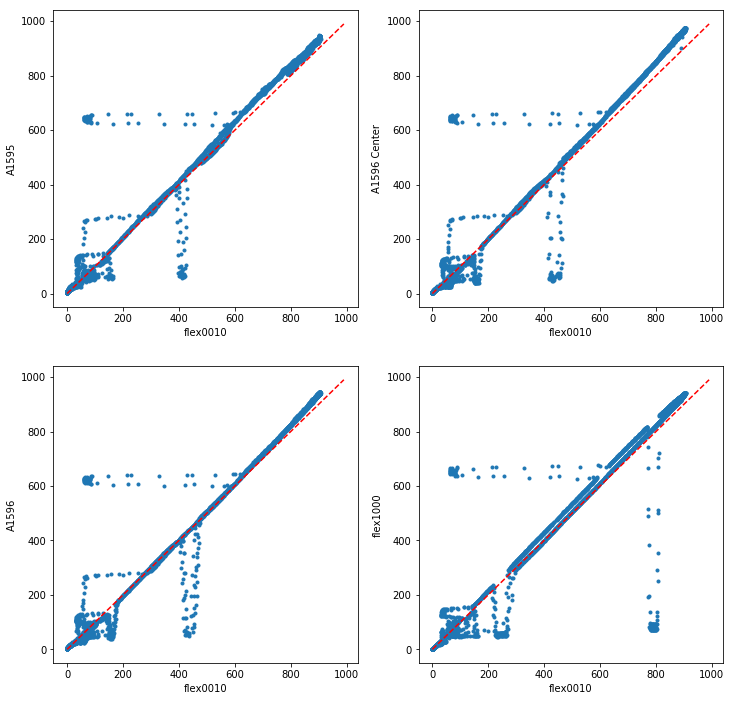

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(df3_sub['Total'],df1_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1595')
plt.xlabel('flex0010')
plt.subplot(2,2,2)
plt.plot(df3_sub['Total'],df2_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1596 Center')
plt.xlabel('flex0010')
plt.subplot(2,2,3)
plt.plot(df3_sub['Total'],df2_sub['Diffuse'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('A1596')
plt.xlabel('flex0010')
plt.subplot(2,2,4)
plt.plot(df3_sub['Total'],df4_sub['Total'],'.')
plt.plot(range(0,1000,10),range(0,1000,10),'--r')
plt.ylabel('flex1000')
plt.xlabel('flex0010')


### Lets look at this as a function of solar angle

In [15]:
import ephem

### plot as function of solar angle
def solar_zenith(timestr='2016-01-01 00:00:00', lat='47.6', lon='-122.32'):
    '''
    Time needs to be a string in UTC
    using subroutine ephem for solar positions
    '''
    location = ephem.Observer()
    location.lon, location.lat, location.date = lon,lat,timestr
    sun = ephem.Sun()
    sun.compute(location)
    sun_az = str(sun.az).split(':')
    sun_el = str(sun.alt).split(':')
    sun_az = float(sun_az[0]) + float(sun_az[1])/60. + float(sun_az[2])/3600.
    sun_el = float(sun_el[0]) + float(sun_el[1])/60. + float(sun_el[2])/3600.

    return (90. - sun_el, sun_az) #return solar zenith angle, solar azimuth angle


In [58]:
df1_sub['sun_el'] = 0.0
df2_sub['sun_el'] = 0.0
df3_sub['sun_el'] = 0.0
df4_sub['sun_el'] = 0.0
df5_sub['sun_el'] = 0.0

In [59]:
#seattle lat=47.6, lon=-122.32
for index, row in df1_sub.iterrows():
    df1_sub.loc[index,'sun_el'] = solar_zenith(index.strftime('%Y-%m-%d %H:%M:%S'),'47.6','-122.32')[0]
for index, row in df2_sub.iterrows():
    df2_sub.loc[index,'sun_el'] = solar_zenith(index.strftime('%Y-%m-%d %H:%M:%S'),'47.6','-122.32')[0]
for index, row in df3_sub.iterrows():
    df3_sub.loc[index,'sun_el'] = solar_zenith(index.strftime('%Y-%m-%d %H:%M:%S'),'47.6','-122.32')[0]
for index, row in df4_sub.iterrows():
    df4_sub.loc[index,'sun_el'] = solar_zenith(index.strftime('%Y-%m-%d %H:%M:%S'),'47.6','-122.32')[0]
for index, row in df5_sub.iterrows():
    df5_sub.loc[index,'sun_el'] = solar_zenith(index.strftime('%Y-%m-%d %H:%M:%S'),'47.6','-122.32')[0]    

(0, 110)

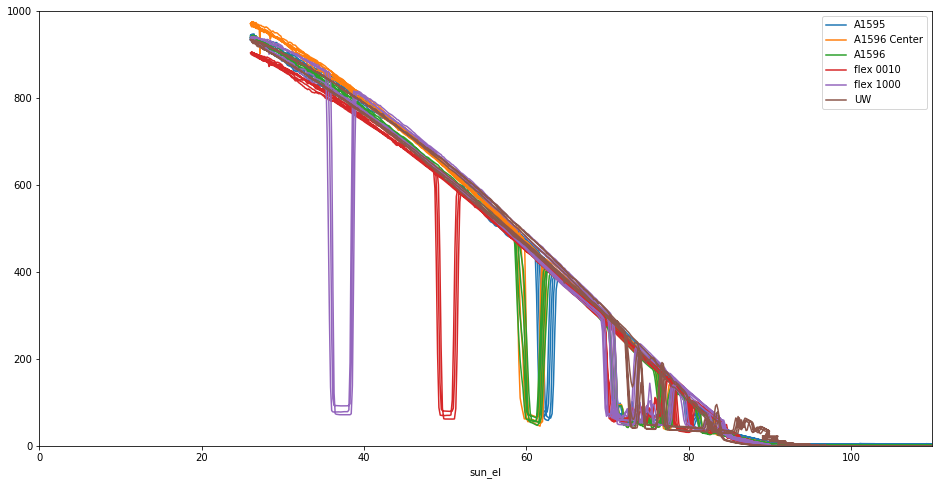

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
df1_sub.plot(x=df1_sub['sun_el'],y=['Total'], ax=plt.gca())
df2_sub.plot(x=df2_sub['sun_el'],y=['Total'], ax=plt.gca())
df2_sub.plot(x=df2_sub['sun_el'],y=['Diffuse'], ax=plt.gca())
df3_sub.plot(x=df3_sub['sun_el'],y=['Total'], ax=plt.gca())
df4_sub.plot(x=df4_sub['sun_el'],y=['Total'], ax=plt.gca())
df5_sub.plot(x=df5_sub['sun_el'],y=['Radn'], ax=plt.gca())
plt.legend(['A1595','A1596 Center', 'A1596','flex 0010','flex 1000','UW'])
plt.ylim([0.0,1000])
plt.xlim([0,110])

The previous figure looks at the incoming solar radiation value as a function of solar zenith angle (angle between the sun and perpendicular to the earths surface... 90degrees is the horizon, 0 degrees is when the sun is directly overhead.  For a symmetrical detector, the morning and evening values should be fairly identical (sky conditions being clear or nearly so).  This holds true for the most part with the flex1000 system being the exception.  (see following plot for more information)

/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


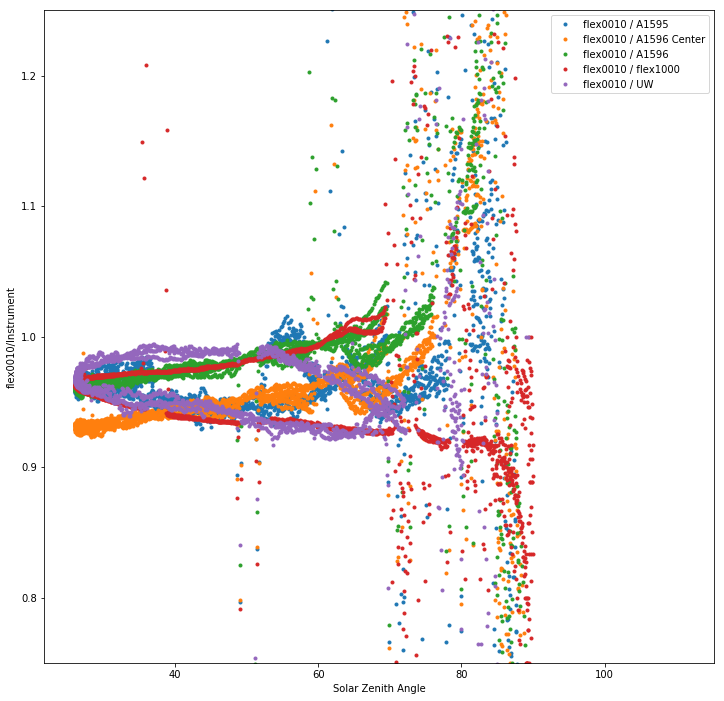

In [62]:
plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
plt.plot(df1_sub['sun_el'],df3_sub['Total']/df1_sub['Total'],'.')
plt.plot(df1_sub['sun_el'],df3_sub['Total']/df2_sub['Total'],'.')
plt.plot(df1_sub['sun_el'],df3_sub['Total']/df2_sub['Diffuse'],'.')
plt.plot(df1_sub['sun_el'],df3_sub['Total']/df4_sub['Total'],'.')
plt.plot(df1_sub['sun_el'],df3_sub['Total']/df5_sub['Radn'],'.')
plt.ylabel('flex0010/Instrument')
plt.xlabel('Solar Zenith Angle')
plt.ylim([0.75,1.25])
plt.legend(['flex0010 / A1595','flex0010 / A1596 Center', 'flex0010 / A1596','flex0010 / flex1000','flex0010 / UW'])


Looking at the ratio between each instrument and the instrument chosen as truth (flex0010) one would expect a constant or nearly so ratio (since all instruments are expected to operate with a simple linear voltage to w/m^2 response).  The flex0010-flex1000 response with morning and evening asymetries is more evident in this plot.  The noise as one approaches large angles is mostly due to the shadows evident in the morning but also includes larger effects due to nonlinearities of the detector at large angles.  The orange (A1596 center) and green (A1596 outer detectors) have a similar response (slope) but with an obvious offset.

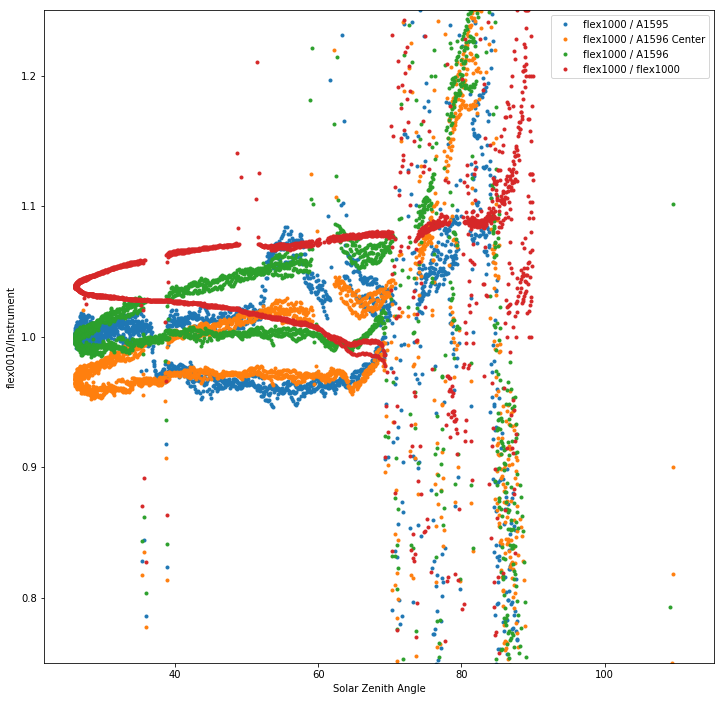

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
plt.plot(df1_sub['sun_el'],df4_sub['Total']/df1_sub['Total'],'.')
plt.plot(df1_sub['sun_el'],df4_sub['Total']/df2_sub['Total'],'.')
plt.plot(df1_sub['sun_el'],df4_sub['Total']/df2_sub['Diffuse'],'.')
plt.plot(df1_sub['sun_el'],df4_sub['Total']/df3_sub['Total'],'.')
plt.ylabel('flex0010/Instrument')
plt.xlabel('Solar Zenith Angle')
plt.ylim([0.75,1.25])
plt.legend(['flex1000 / A1595','flex1000 / A1596 Center', 'flex1000 / A1596','flex1000 / flex1000'])


If we use the flex1000 as our reference, all the instruments have a morning/evening discrepency... this convinces me that there is an anomaly with the flex1000 unit.